In [1]:
import os
import json
import numpy as np
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from pysheds.grid import Grid
from matplotlib import colors
import seaborn as sns
import warnings
from swmmtoolbox import swmmtoolbox
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore')
sns.set()
sns.set_palette('husl', 7)

%matplotlib inline

In [2]:
output_dir = '../data/out'

var = {}
maxes = {}

for fn in os.listdir(output_dir):
    if ('phi10' in fn) or ('naive' in fn) or ('uncontrolled' in fn):
        basename = fn.split('.out')[0]
        outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
        var[basename] = outfall.var()[0]
        maxes[basename] = outfall.max()[0]
            
var = pd.Series(var).sort_values()
maxes = pd.Series(maxes).sort_values()

In [3]:
var = var[~var.index.str.contains('quadratic')]
maxes = maxes[~maxes.index.str.contains('quadratic')]

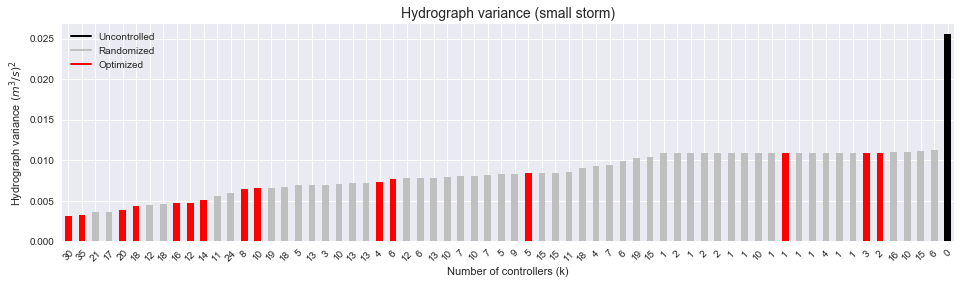

In [4]:
fig, ax = plt.subplots(figsize=(16,4))
var05 = var[var.index.str.contains('0.5in')].sort_values()
colors = pd.Series(var05.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var05.index = pd.Series(var05.index.str.extract('k(\d+)')).replace(np.nan, '0').values
var05.plot(kind='bar', colors=colors, rot=45)
plt.title('Hydrograph variance (small storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Hydrograph variance $(m^3/s)^2$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_var_small.png', bbox_inches='tight')


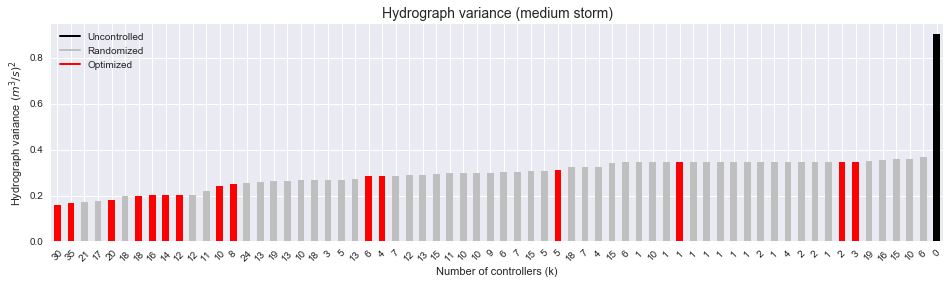

In [5]:
fig, ax = plt.subplots(figsize=(16,4))
var15 = var[var.index.str.contains('1.5in')].sort_values()
colors = pd.Series(var15.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var15.index = pd.Series(var15.index.str.extract('k(\d+)')).replace(np.nan, '0').values
var15.plot(kind='bar', colors=colors, rot=45)
plt.title('Hydrograph variance (medium storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Hydrograph variance $(m^3/s)^2$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_var_med.png', bbox_inches='tight')


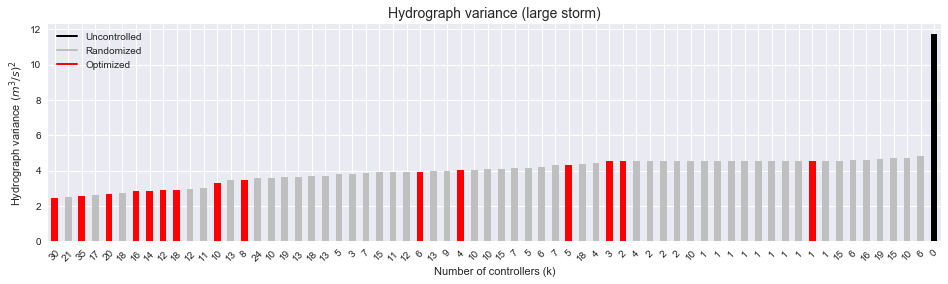

In [6]:
fig, ax = plt.subplots(figsize=(16,4))
var40 = var[var.index.str.contains('4in')].sort_values()
colors = pd.Series(var40.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var40.index = pd.Series(var40.index.str.extract('k(\d+)')).replace(np.nan, '0').values
var40.plot(kind='bar', colors=colors, rot=45)
plt.title('Hydrograph variance (large storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Hydrograph variance $(m^3/s)^2$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_var_large.png', bbox_inches='tight')



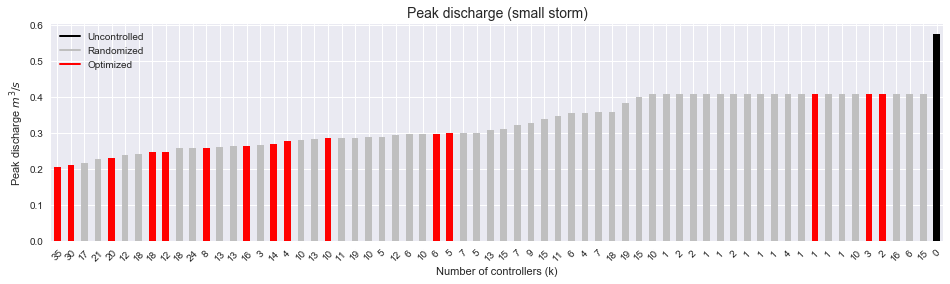

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
max05 = maxes[maxes.index.str.contains('0.5in')].sort_values()
colors = pd.Series(max05.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
max05.index = pd.Series(max05.index.str.extract('k(\d+)')).replace(np.nan, '0').values
max05.plot(kind='bar', colors=colors, rot=45)
plt.title('Peak discharge (small storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Peak discharge $m^3/s$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_max_small.png', bbox_inches='tight')



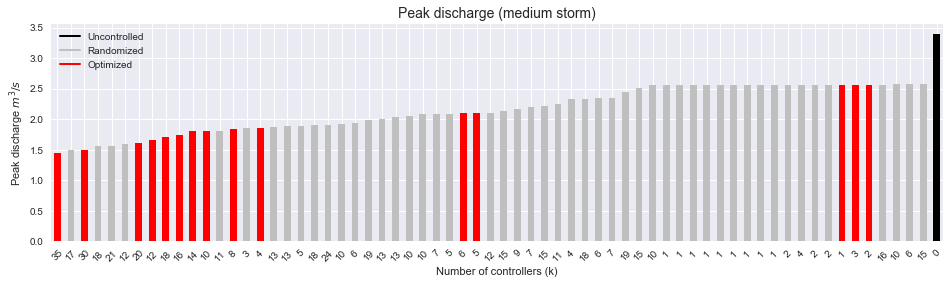

In [8]:
fig, ax = plt.subplots(figsize=(16,4))
max15 = maxes[maxes.index.str.contains('1.5in')].sort_values()
colors = pd.Series(max15.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
max15.index = pd.Series(max15.index.str.extract('k(\d+)')).replace(np.nan, '0').values
max15.plot(kind='bar', colors=colors, rot=45)
plt.title('Peak discharge (medium storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Peak discharge $m^3/s$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_max_med.png', bbox_inches='tight')



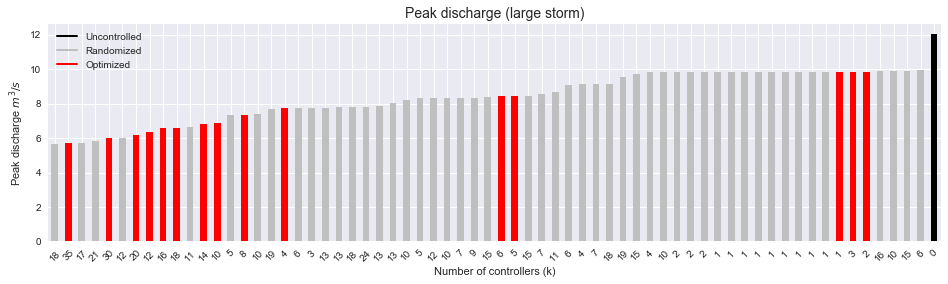

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
max40 = maxes[maxes.index.str.contains('4in')].sort_values()
colors = pd.Series(max40.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
max40.index = pd.Series(max40.index.str.extract('k(\d+)')).replace(np.nan, '0').values
max40.plot(kind='bar', colors=colors, rot=45)
plt.title('Peak discharge (large storm)', size=14)
ax.set_xlabel('Number of controllers (k)')
ax.set_ylabel('Peak discharge $m^3/s$')
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax.legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=2)
plt.savefig('../img/full_perf_max_large.png', bbox_inches='tight')
